Лабораторная работа №1, Научное Программирование

Добрый день! За основу я взяла датасет от Сбербанка:
https://www.kaggle.com/competitions/sberbank-russian-housing-market  
Сам датасет не получилось скачать с кэггла (что-то с аккаунтом), поэтому брала отсюда:  
https://github.com/AdmiralWen/Sberbank-Russian-Housing-Market  
Датасет представляет из себя набор данных об объектах недвижимости (как я поняла, имеется в виду жилая недвижимость).
Ниже скопированы описания параметров:

In [1]:
# price_doc: sale price (this is the target variable)
# id: transaction id
# timestamp: date of transaction
# full_sq: total area in square meters, including loggias, balconies and other non-residential areas
# life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
# floor: for apartments, floor of the building
# max_floor: number of floors in the building
# material: wall material
# build_year: year built
# num_room: number of living rooms
# kitch_sq: kitchen area
# state: apartment condition
# product_type: owner-occupier purchase or investment
# sub_area: name of the district

# The dataset also includes a collection of features about each property's surrounding neighbourhood,
# and some features that are constant across each sub area (known as a Raion).
# Most of the feature names are self explanatory, with the following notes. See below for a complete list.

# full_all: subarea population
# male_f, female_f: subarea population by gender
# young_*: population younger than working age
# work_*: working-age population
# ekder_*: retirement-age population
# n_m_{all|male|female}: population between n and m years old
# build_count_*: buildings in the subarea by construction type or year
# x_count_500: the number of x within 500m of the property
# x_part_500: the share of x within 500m of the property
# _sqm_: square meters
# cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
# trc_: shopping malls
# prom_: industrial zones
# green_: green zones
# metro_: subway
# _avto_: distances by car
# mkad_: Moscow Circle Auto Road
# ttk_: Third Transport Ring
# sadovoe_: Garden Ring
# bulvar_ring_: Boulevard Ring
# kremlin_: City center
# zd_vokzaly_: Train station
# oil_chemistry_: Dirty industry
# ts_: Power plant

Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Импортируем датасет:

In [146]:
train = pd.read_csv('sber.csv')
train

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0        1  2011-08-20       43     27.0    4.0        NaN       NaN   
1        2  2011-08-23       34     19.0    3.0        NaN       NaN   
2        3  2011-08-27       43     29.0    2.0        NaN       NaN   
3        4  2011-09-01       89     50.0    9.0        NaN       NaN   
4        5  2011-09-05       77     77.0    4.0        NaN       NaN   
...    ...         ...      ...      ...    ...        ...       ...   
6902  6905  2013-03-30       88     79.0    4.0        NaN       NaN   
6903  6906  2013-03-30       76     32.0    9.0        NaN       NaN   
6904  6907  2013-03-30      106     54.0    9.0        NaN       NaN   
6905  6908  2013-04-01       79      NaN   17.0        NaN       NaN   
6906  6909  2013-04-01       83     83.0    5.0        NaN       NaN   

      build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0            NaN       NaN       NaN  ...                         9.0   
1            NaN       NaN       NaN  ...                        15.0   
2            NaN       NaN       NaN  ...                        10.0   
3            NaN       NaN       NaN  ...                        11.0   
4            NaN       NaN       NaN  ...                       319.0   
...          ...       ...       ...  ...                         ...   
6902         NaN       NaN       NaN  ...                        14.0   
6903         NaN       NaN       NaN  ...                        33.0   
6904         NaN       NaN       NaN  ...                        13.0   
6905         NaN       NaN       NaN  ...                         1.0   
6906         NaN       NaN       NaN  ...                         NaN   

     cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                           4.0                        0.0   
1                           3.0                        0.0   
2                           3.0                        0.0   
3                           2.0                        1.0   
4                         108.0                       17.0   
...                         ...                        ...   
6902                        3.0                        0.0   
6903                        6.0                        1.0   
6904                        4.0                        1.0   
6905                        0.0                        0.0   
6906                        NaN                        NaN   

      big_church_count_5000  church_count_5000  mosque_count_5000  \
0                      13.0               22.0                1.0   
1                      15.0               29.0                1.0   
2                      11.0               27.0                0.0   
3                       4.0                4.0                0.0   
4                     135.0              236.0                2.0   
...                     ...                ...                ...   
6902                   11.0               11.0                0.0   
6903                   17.0               34.0                1.0   
6904                    5.0                8.0                0.0   
6905                    4.0                6.0                0.0   
6906                    NaN                NaN                NaN   

      leisure_count_5000  sport_count_5000  market_count_5000   price_doc  
0                    0.0              52.0                4.0   5850000.0  
1                   10.0              66.0               14.0   6000000.0  
2                    4.0              67.0               10.0   5700000.0  
3                    0.0              26.0                3.0  13100000.0  
4                   91.0             195.0               14.0  16331452.0  
...                  ...               ...                ...         ...  
6902                 1.0              56.0                5.0  13583544.0  
6903                13.0              66.0               13.0  11000000.0  
6904    

Визуально видно, что в таблице много пропусков. Как видно, есть целые столбцы без информации:

In [147]:
train['num_room'].isnull().sum()

6907

Уберем те столбцы, которые содержат менее половины значений:

In [148]:
for column in train.columns:
    if train[column].isnull().sum()>0.5*len(column):
        train.drop(column, inplace=True, axis=1)
train

id   timestamp  full_sq   product_type             sub_area  \
0        1  2011-08-20       43     Investment             Bibirevo   
1        2  2011-08-23       34     Investment    Nagatinskij Zaton   
2        3  2011-08-27       43     Investment       Tekstil'shhiki   
3        4  2011-09-01       89     Investment               Mitino   
4        5  2011-09-05       77     Investment            Basmannoe   
...    ...         ...      ...            ...                  ...   
6902  6905  2013-03-30       88  OwnerOccupier     Severnoe Tushino   
6903  6906  2013-03-30       76     Investment   Nagatino-Sadovniki   
6904  6907  2013-03-30      106     Investment               Mitino   
6905  6908  2013-04-01       79  OwnerOccupier           Nekrasovka   
6906  6909  2013-04-01       83  OwnerOccupier  Poselenie Sosenskoe   

            area_m  raion_popul  green_zone_part  indust_part  \
0     6.407578e+06       155572         0.189727     0.000070   
1     9.589337e+06       115352         0.372602     0.049637   
2     4.808270e+06       101708         0.112560     0.118537   
3     1.258354e+07       178473         0.194703     0.069753   
4     8.398461e+06       108171         0.015234     0.037316   
...            ...          ...              ...          ...   
6902  9.249237e+06       156377         0.374068     0.000000   
6903  7.750778e+06        76284         0.094681     0.313925   
6904  1.258354e+07       178473         0.194703     0.069753   
6905  1.139168e+07        19940         0.055644     0.243205   
6906  6.677245e+07         9553         0.336177     0.072158   

      children_preschool  ...  cafe_count_5000_price_2500  \
0                   9576  ...                         9.0   
1                   6880  ...                        15.0   
2                   5879  ...                        10.0   
3                  13087  ...                        11.0   
4                   5706  ...                       319.0   
...                  ...  ...                         ...   
6902               10190  ...                        14.0   
6903                4935  ...                        33.0   
6904               13087  ...                        13.0   
6905                1706  ...                         1.0   
6906                 656  ...                         NaN   

      cafe_count_5000_price_4000  cafe_count_5000_price_high  \
0                            4.0                         0.0   
1                            3.0                         0.0   
2                            3.0                         0.0   
3                            2.0                         1.0   
4                          108.0                        17.0   
...                          ...                         ...   
6902                         3.0                         0.0   
6903                         6.0                         1.0   
6904                         4.0                         1.0   
6905                         0.0                         0.0   
6906                         NaN                         NaN   

      big_church_count_5000  church_count_5000  mosque_count_5000  \
0                      13.0               22.0                1.0   
1                      15.0               29.0                1.0   
2                      11.0               27.0                0.0   
3                       4.0                4.0                0.0   
4                     135.0              236.0                2.0   
...                     ...                ...                ...   
6902                   11.0               11.0                0.0   
6903                   17.0               34.0                1.0   
6904                    5.0                8.0                0.0   
6905                    4.0                6.0                0.0   
6906                    NaN                NaN                NaN   

      leisure_count_5000  sport_count_5000 

Посмотрим на параметры и их тип:

In [6]:
for i in train.columns:
    print (i, train[i].dtypes)

id int64
timestamp object
full_sq int64
product_type object
sub_area object
area_m float64
raion_popul int64
green_zone_part float64
indust_part float64
children_preschool int64
preschool_education_centers_raion int64
children_school int64
school_education_centers_raion int64
school_education_centers_top_20_raion int64
healthcare_centers_raion int64
university_top_20_raion int64
sport_objects_raion int64
additional_education_raion int64
culture_objects_top_25 object
culture_objects_top_25_raion int64
shopping_centers_raion int64
office_raion int64
thermal_power_plant_raion object
incineration_raion object
oil_chemistry_raion object
radiation_raion object
railroad_terminal_raion object
big_market_raion object
nuclear_reactor_raion object
detention_facility_raion object
full_all int64
male_f int64
female_f int64
young_all int64
young_male int64
young_female int64
work_all int64
work_male int64
work_female int64
ekder_all int64
ekder_male int64
ekder_female int64
0_6_all int64
0_6_male in

In [8]:
# пример того, какие значения могут принимать параметры
Counter(train['nuclear_reactor_raion'])

Counter({'no': 6705, 'yes': 202})

In [ ]:
Counter(train['nuclear_reactor_raion'])

In [117]:
train[train['nuclear_reactor_raion']=='yes']['sub_area']

33      Moskvorech'e-Saburovo
73                Dmitrovskoe
97      Moskvorech'e-Saburovo
115               Dmitrovskoe
130               Golovinskoe
                ...          
6396              Golovinskoe
6439              Dmitrovskoe
6692              Golovinskoe
6709    Moskvorech'e-Saburovo
6729              Dmitrovskoe
Name: sub_area, Length: 202, dtype: object

In [143]:
Counter(train[train['nuclear_reactor_raion']=='yes']['sub_area'])

Counter({"Moskvorech'e-Saburovo": 24,
         'Dmitrovskoe': 42,
         'Golovinskoe': 57,
         'Akademicheskoe': 43,
         'Shhukino': 36})

Гипотеза состоит в том, что какие-то параметры квартир в этой таблице влияют на цену квартиры. Попробуем выбрать эти параметры и доказать их влияние.

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 111,111,112 рублей
Средняя цена за объект недвижимости составляла 6,332,322 рублей, медианная цена - 5,650,000 рублей


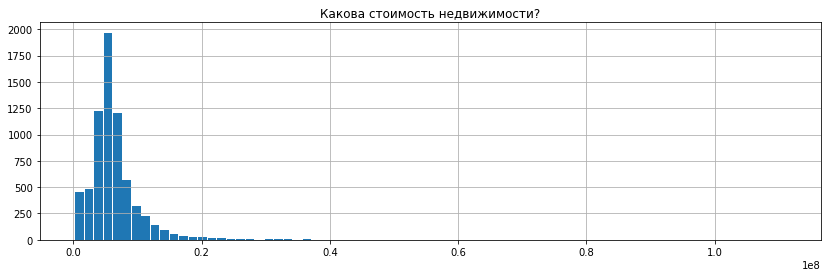

In [11]:
# посмотрим на целевую переменную:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

Самый ближайший объект находится в 0.09 минутах от метро, самый дальний - в 600.32 минутах.


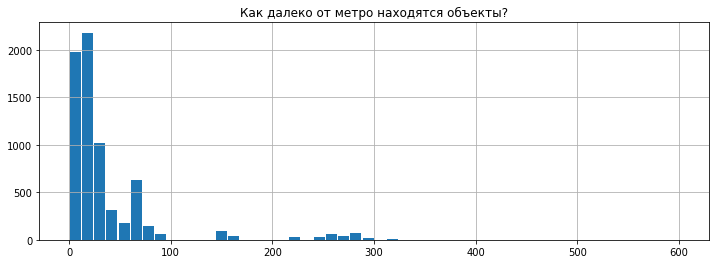

In [12]:
# посмотрим на распределение жилья в зависимости от количества минут пешком до метро
print('Самый ближайший объект находится в {} минутах от метро, самый дальний - в {} минутах.'.format(
    round(train.metro_min_walk.min(),2), round(train.metro_min_walk.max(),2)))
train.metro_min_walk.hist(bins=50, rwidth=.9, figsize=(12,4))
plt.title('Как далеко от метро находятся объекты?')
plt.show()

Большинство жилищ в 0-30 минутах от метро, видимо, это связано с тем, что в Москве много станций.

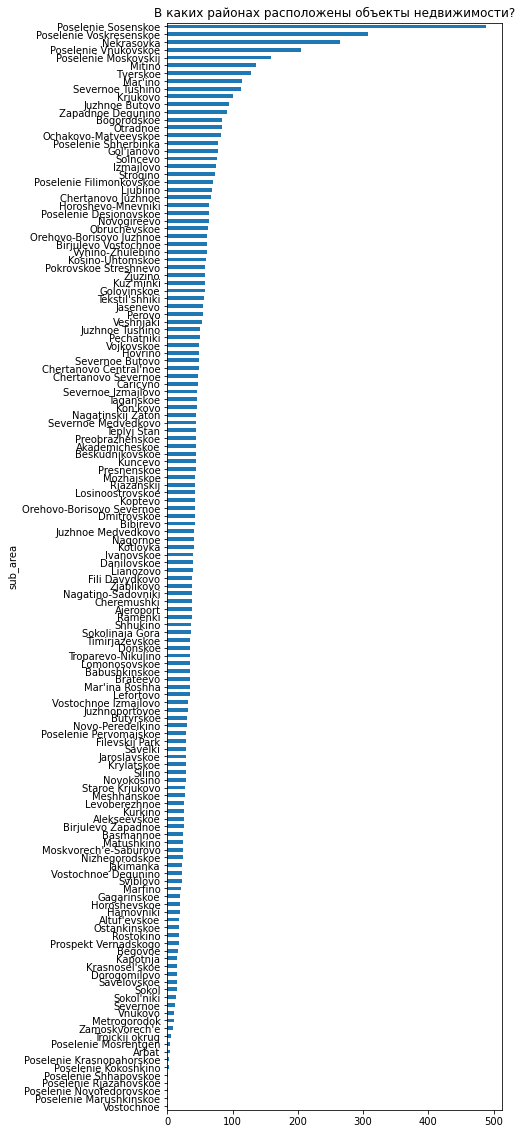

In [13]:
# посмотрим, в каких районах расположены объекты
train.groupby('sub_area').id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,20))
plt.title('В каких районах расположены объекты недвижимости?')
plt.show()

Самая большая площадь объекта недвижимости составляет 5,326 кв.м., самая маленькая - 5 кв.м.
Средняя площадь объекта недвижимости составляет 54 кв.м., медианная - 45 кв.м.


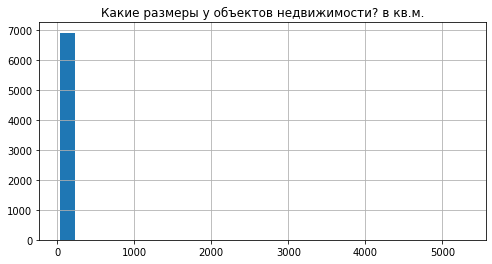

In [47]:
# Насколько большие продаваемые объекты по площади?
print('Самая большая площадь объекта недвижимости составляет {:,.0f} кв.м., самая маленькая - {:,.0f} кв.м.'.format(
    train.full_sq.max(), train.full_sq.min()))
print('Средняя площадь объекта недвижимости составляет {:,.0f} кв.м., медианная - {:,.0f} кв.м.'.format(
    train.full_sq.mean(), train.full_sq.median()))

train.full_sq.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Какие размеры у объектов недвижимости? в кв.м.')
plt.show()

Мы видим, что у нас большие выбросы что в цене, что в жилой площади, поэтому предлагается выкинуть что-то очень большое.

<AxesSubplot:xlabel='full_sq'>

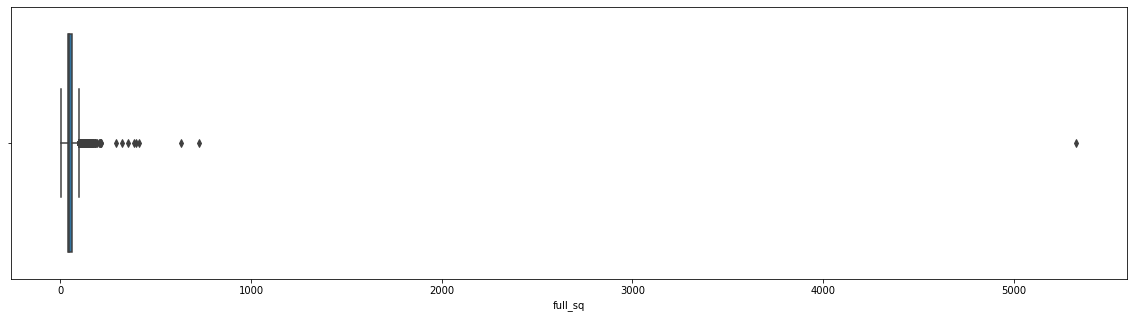

In [48]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["full_sq"])

Возьмем объекты до 1000 кв.м.

In [49]:
train.shape

(6907, 249)

In [149]:
train = train[train['full_sq'] < 1000]
train.shape

(6906, 249)

<AxesSubplot:xlabel='full_sq'>

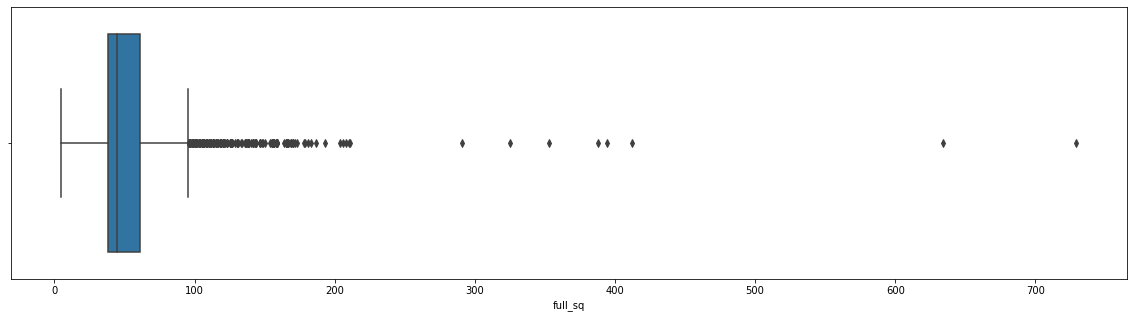

In [51]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["full_sq"])

Судя по этому графику мы можем взять объекты площадью менее 250 кв.м.

In [150]:
train = train[train['full_sq'] < 250]
train.shape

(6898, 249)

Самая большая площадь объекта недвижимости составляет 211 кв.м., самая маленькая - 5 кв.м.
Средняя площадь объекта недвижимости составляет 52 кв.м., медианная - 45 кв.м.


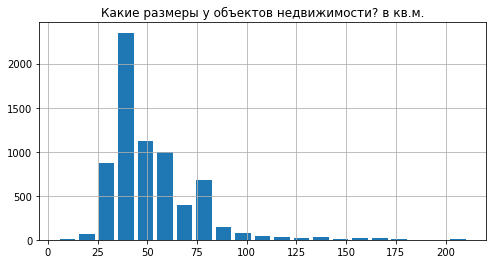

In [53]:
print('Самая большая площадь объекта недвижимости составляет {:,.0f} кв.м., самая маленькая - {:,.0f} кв.м.'.format(
    train.full_sq.max(), train.full_sq.min()))
print('Средняя площадь объекта недвижимости составляет {:,.0f} кв.м., медианная - {:,.0f} кв.м.'.format(
    train.full_sq.mean(), train.full_sq.median()))

train.full_sq.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Какие размеры у объектов недвижимости? в кв.м.')
plt.show()

После корректировки данных с учетом большой площади, посмотрим на изменившееся распределение по цене:

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 111,111,112 рублей
Средняя цена за объект недвижимости составляла 6,332,047 рублей, медианная цена - 5,650,000 рублей


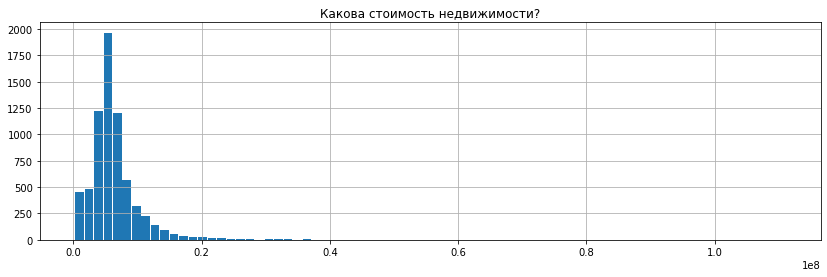

In [54]:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

<AxesSubplot:xlabel='price_doc'>

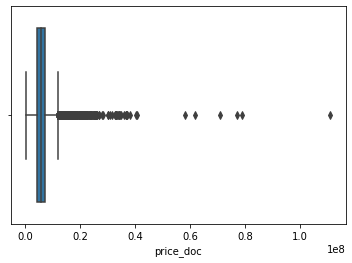

In [55]:
sns.boxplot(x=train["price_doc"])

Исходя из этого графика возьмём объекты стоимостью менее 50 млн.рублей.

In [151]:
train = train[train['price_doc'] < 50000000]
train.shape
# всего на 9 квартир меньше, а данные будут более показательные

(6891, 249)

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 40,500,000 рублей
Средняя цена за объект недвижимости составляла 6,271,083 рублей, медианная цена - 5,650,000 рублей


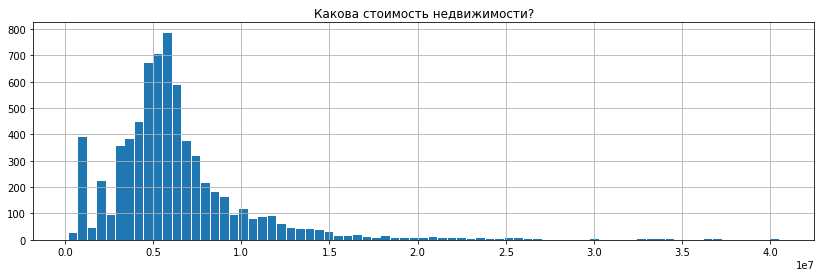

In [57]:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

Будем анализировать только количественные переменные.

In [152]:
num_features = train.select_dtypes(include=['int64','float64']).columns # оставляем только количественные фичи
num_features = list(num_features.drop(['id','price_doc'])) # убираем столбец id и целевой столбец
num_features

['full_sq',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',

Посмотрим на корреляцию между каждой количественной переменной и переменной цены.

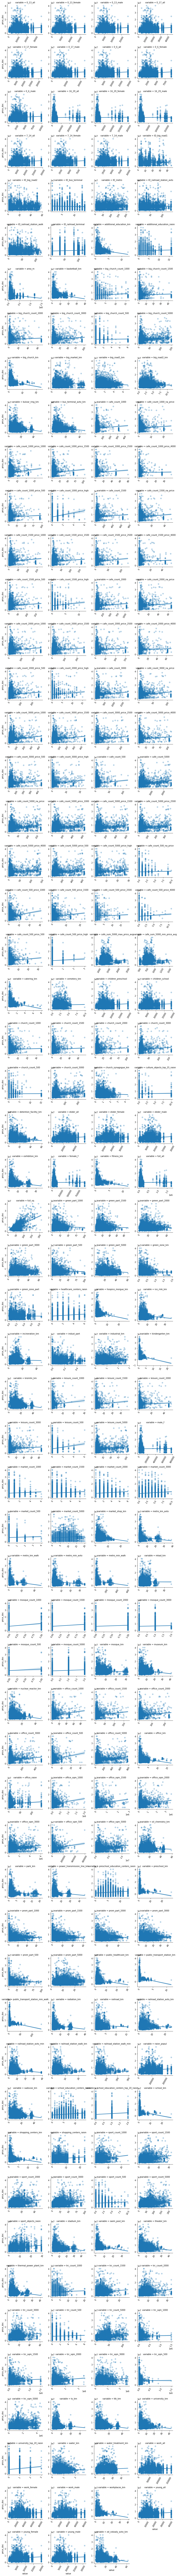

In [60]:
# Scatter plots of numerical features against SalePrice
f = pd.melt(train, id_vars=['price_doc'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'price_doc', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Зависимость, в первую очередь, наблюдается между ценой и размером жилплощади, что закономерно и предсказуемо. Как ни странно, между объемом зеленой зоны в районе и ценой не наблюдается корреляции, а также обратной корреляции не наблюдается в соотношении цены и объема индустриальной зоны. Как и ожидалось, существует обратная корреляция между временем до метро/до остановки общественного транспорта и ценой.

Посмотрим на корреляцию по каждому параметру по отношению к цене. По умолчанию корреляция считается по Пирсону, но поскольку у нас несимметричное распределение, посчитаем по Кендаллу.

In [159]:
train[train.columns[1:]].corr(method='kendall')['price_doc'][:].sort_values(ascending=False).to_frame().head(40)

price_doc
price_doc                    1.000000
full_sq                      0.313061
cafe_count_2000_price_2500   0.245503
cafe_count_3000_price_1500   0.241474
cafe_count_3000_price_2500   0.240562
cafe_count_2000              0.240220
cafe_count_2000_price_1500   0.237940
cafe_count_2000_price_1000   0.234698
cafe_count_1500              0.234684
cafe_count_3000_price_1000   0.233686
cafe_count_3000              0.232806
cafe_count_5000_price_2500   0.231747
cafe_count_2000_price_500    0.231146
cafe_count_1500_price_1500   0.230150
sport_count_2000             0.228146
cafe_count_1000              0.228064
trc_count_3000               0.227657
cafe_count_1500_price_500    0.226799
sport_count_3000             0.225430
cafe_count_5000_price_1500   0.224320
cafe_count_5000              0.223729
cafe_count_1500_price_1000   0.223200
cafe_count_3000_price_500    0.223064
cafe_count_5000_price_1000   0.222741
cafe_count_1000_price_1500   0.220195
cafe_count_1500_price_2500   0.219873
office_count_3000            0.219102
cafe_count_5000_price_500    0.219032
cafe_count_5000_na_price     0.216918
sport_count_1500             0.216636
trc_count_5000               0.216539
cafe_count_1000_price_500    0.214967
sport_count_5000             0.213437
cafe_count_3000_na_price     0.212404
office_count_5000            0.210367
sport_objects_raion          0.210325
trc_count_2000               0.209738
office_sqm_3000              0.208211
office_count_2000            0.205514
cafe_count_2000_na_price     0.203367

In [160]:
train[train.columns[1:]].corr(method='kendall')['price_doc'][:].sort_values(ascending=False).to_frame().tail(40)

price_doc
big_road2_km                       -0.109896
kindergarten_km                    -0.115416
additional_education_km            -0.115558
public_transport_station_km        -0.116593
public_transport_station_min_walk  -0.116593
preschool_km                       -0.126466
ts_km                              -0.128328
museum_km                          -0.129309
bus_terminal_avto_km               -0.133266
school_km                          -0.133369
area_m                             -0.135757
hospice_morgue_km                  -0.136437
radiation_km                       -0.147044
theater_km                         -0.149414
market_shop_km                     -0.152040
thermal_power_plant_km             -0.153584
park_km                            -0.160211
fitness_km                         -0.161900
exhibition_km                      -0.163266
catering_km                        -0.165470
metro_min_avto                     -0.166384
metro_km_avto                      -0.167546
shopping_centers_km                -0.170449
big_church_km                      -0.171869
swim_pool_km                       -0.172298
metro_km_walk                      -0.172351
metro_min_walk                     -0.172351
detention_facility_km              -0.173270
public_healthcare_km               -0.173871
university_km                      -0.174611
basketball_km                      -0.181959
workplaces_km                      -0.182700
office_km                          -0.184702
nuclear_reactor_km                 -0.186704
zd_vokzaly_avto_km                 -0.197861
bulvar_ring_km                     -0.198900
ttk_km                             -0.200644
stadium_km                         -0.200777
sadovoe_km                         -0.201672
kremlin_km                         -0.202116

In [ ]:
# Kendall's tau-B values:
# Less than + or - 0.10: very weak
# + or -0.10 to 0.19: weak
# + or - 0.20 to 0.29: moderate
# + or - 0.30 or above: strong

Выберем 5 фичей с наибольшим коэффициентом и 5 фичей с наибольшим по модулю отрицательным коэффициентом, но не будем брать те которые очевидно из названия слишком похожи между собой (например, cafe_count_5000_price_1000 и cafe_count_5000_price_1500).

 Оставим для анализа только 10 выбранных параметров и посмотрим на их корреляцию между собой.

In [170]:
num_features = ['full_sq',\
'cafe_count_2000_price_2500',\
'sport_count_2000',\
'trc_count_3000',\
'office_count_3000',\
'kremlin_km',\
'stadium_km',\
'ttk_km',\
'zd_vokzaly_avto_km',\
'office_km']

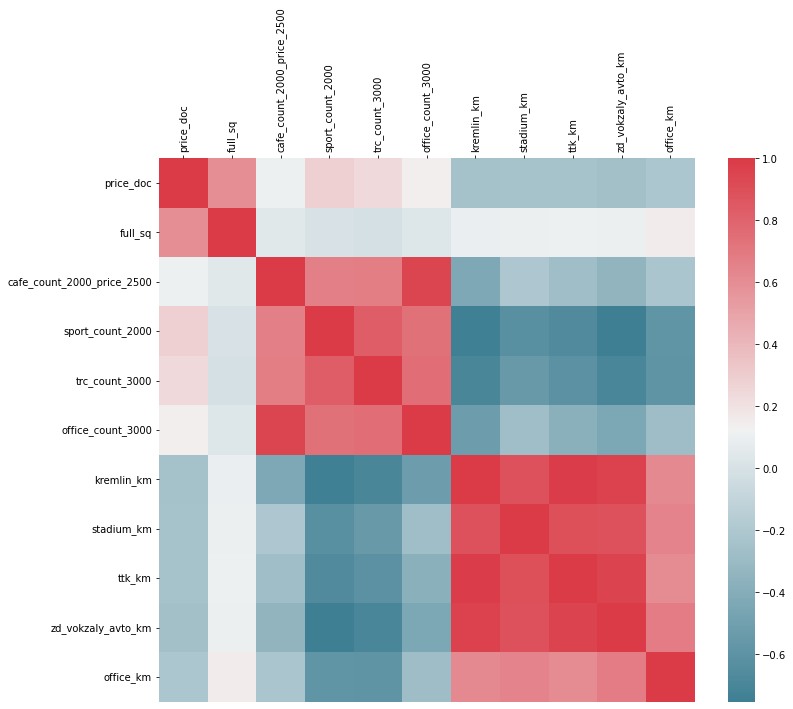

In [171]:
corr = train[['price_doc'] + num_features].corr()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [172]:
train = train[['id','sub_area','price_doc']+num_features]

In [173]:
train

id            sub_area   price_doc  full_sq  \
0        1            Bibirevo   5850000.0       43   
1        2   Nagatinskij Zaton   6000000.0       34   
2        3      Tekstil'shhiki   5700000.0       43   
3        4              Mitino  13100000.0       89   
4        5           Basmannoe  16331452.0       77   
...    ...                 ...         ...      ...   
6901  6904              Perovo   5400000.0       35   
6902  6905    Severnoe Tushino  13583544.0       88   
6903  6906  Nagatino-Sadovniki  11000000.0       76   
6904  6907              Mitino   8919000.0      106   
6905  6908          Nekrasovka   6453216.0       79   

      cafe_count_2000_price_2500  sport_count_2000  trc_count_3000  \
0                            2.0              10.0            23.0   
1                            2.0              11.0            14.0   
2                            1.0               8.0             7.0   
3                            1.0              13.0            12.0   
4                           50.0              21.0            60.0   
...                          ...               ...             ...   
6901                         2.0              18.0             6.0   
6902                         2.0               8.0            16.0   
6903                         2.0              15.0            20.0   
6904                         4.0               9.0            21.0   
6905                         0.0               0.0             2.0   

      office_count_3000  kremlin_km  stadium_km     ttk_km  \
0                  12.0   15.156211    8.148591  10.918587   
1                  12.0    8.698054    6.127073   3.103996   
2                   8.0    9.067885    0.767569   2.927487   
3                   4.0   19.487005    7.385521  14.606501   
4                 305.0    2.578671    3.610754   1.721834   
...                 ...         ...         ...        ...   
6901               11.0   10.066627    2.269290   5.042467   
6902                7.0   15.378836    3.931453  10.624808   
6903               32.0    7.965604    4.008442   2.970003   
6904                8.0   16.933422    4.180124  12.098658   
6905                0.0   19.763938   13.430703  13.645008   

      zd_vokzaly_avto_km  office_km  
0              14.231961   0.637189  
1               9.242586   0.688796  
2               9.540544   1.543049  
3              17.478380   0.934273  
4               1.595898   0.077901  
...                  ...        ...  
6901           10.531600   0.709259  
6902           14.254331   0.736745  
6903            7.123955   0.167596  
6904           14.272983   0.774714  
6905           25.256469   5.273047  

[6891 rows x 13 columns]

In [174]:
train.columns

Index(['id', 'sub_area', 'price_doc', 'full_sq', 'cafe_count_2000_price_2500',
       'sport_count_2000', 'trc_count_3000', 'office_count_3000', 'kremlin_km',
       'stadium_km', 'ttk_km', 'zd_vokzaly_avto_km', 'office_km'],
      dtype='object')

Подготовим данные для модели, оставив только количественные параметры без целевой переменной и id.

In [175]:
X = train.drop(labels=['id','sub_area', 'price_doc'], axis=1)
X

full_sq  cafe_count_2000_price_2500  sport_count_2000  trc_count_3000  \
0          43                         2.0              10.0            23.0   
1          34                         2.0              11.0            14.0   
2          43                         1.0               8.0             7.0   
3          89                         1.0              13.0            12.0   
4          77                        50.0              21.0            60.0   
...       ...                         ...               ...             ...   
6901       35                         2.0              18.0             6.0   
6902       88                         2.0               8.0            16.0   
6903       76                         2.0              15.0            20.0   
6904      106                         4.0               9.0            21.0   
6905       79                         0.0               0.0             2.0   

      office_count_3000  kremlin_km  stadium_km     ttk_km  \
0                  12.0   15.156211    8.148591  10.918587   
1                  12.0    8.698054    6.127073   3.103996   
2                   8.0    9.067885    0.767569   2.927487   
3                   4.0   19.487005    7.385521  14.606501   
4                 305.0    2.578671    3.610754   1.721834   
...                 ...         ...         ...        ...   
6901               11.0   10.066627    2.269290   5.042467   
6902                7.0   15.378836    3.931453  10.624808   
6903               32.0    7.965604    4.008442   2.970003   
6904                8.0   16.933422    4.180124  12.098658   
6905                0.0   19.763938   13.430703  13.645008   

      zd_vokzaly_avto_km  office_km  
0              14.231961   0.637189  
1               9.242586   0.688796  
2               9.540544   1.543049  
3              17.478380   0.934273  
4               1.595898   0.077901  
...                  ...        ...  
6901           10.531600   0.709259  
6902           14.254331   0.736745  
6903            7.123955   0.167596  
6904           14.272983   0.774714  
6905           25.256469   5.273047  

[6891 rows x 10 columns]

In [176]:
y = train['price_doc']
y

0        5850000.0
1        6000000.0
2        5700000.0
3       13100000.0
4       16331452.0
           ...    
6901     5400000.0
6902    13583544.0
6903    11000000.0
6904     8919000.0
6905     6453216.0
Name: price_doc, Length: 6891, dtype: float64

In [177]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # создаем класс
reg.fit(X, y)

LinearRegression()

In [178]:
y_pred = reg.predict(X)

In [179]:
y_pred

array([ 5673101.33450439,  5209813.00519828,  5906947.56860701, ...,
       10515486.26923079, 12935941.94100403,  7556922.01004606])

In [180]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.4780979220579187

Попробуем убрать часть параметров, которые судя по тепловой карте сильно коррелируют между собой.

In [182]:
X_2 = X.drop(labels=['kremlin_km', 'zd_vokzaly_avto_km'], axis=1)
reg.fit(X_2, y)
y_pred_2 = reg.predict(X_2)
r2_score(y, y_pred_2)

0.4772847449413061

Модель ухудшилась, значит не стоит их убирать.

Из таблицы корреляции было очевидно, что самым выжным параметром являлся full_sq. Попробуюет посчитать R2 без него.

In [184]:
X_3 = X.drop(labels=['full_sq'], axis=1)
reg.fit(X_3, y)
y_pred_3 = reg.predict(X_3)
r2_score(y, y_pred_3)

0.09674933770122585

Тут я попробовала нормализовать изначальные данные, чтобы понять, влияет ли это на результат, но оказалось что совершенно не влияет.

In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_4 = scaler.fit_transform(X)
reg.fit(X_4, y)
y_pred_4 = reg.predict(X_4)
r2_score(y, y_pred_4)

0.4780979220579188

In [120]:
reg.fit(X_3, y)
y_pred_3 = reg.predict(X_3)
r2_score(y, y_pred_3)

0.5001957846708235

Посчитаем модель только на параметре full_sq.

In [186]:
reg.fit(X['full_sq'].to_numpy().reshape(-1, 1), y)
y_pred_4 = reg.predict(X['full_sq'].to_numpy().reshape(-1, 1))
r2_score(y, y_pred_4)

0.34695092323716037

Таким образом, мы делаем вывод, что единственным значимом параметром для определения цены является количество квадратных метров квартиры. Остальные параметры вносят очень небольшой вклад.  
Построим график зависимости цены от площади.

<AxesSubplot:xlabel='full_sq', ylabel='price_doc'>

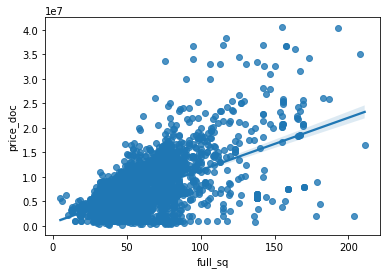

In [187]:
sns.regplot(x="full_sq", y="price_doc", data=train)